# Dataset Energia LSTM

O desafio é prever o próximo preço da energia (na próxima hora).

In [1]:
import math
import pandas as pd
pd.set_option('display.max_columns', 80)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset: https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather
data_energia = pd.read_csv('data/energy_dataset.csv')
data_clima = pd.read_csv('data/weather_features.csv')

## Explorando os dados

### Dataset Energia

In [3]:
data_energia.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
data_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
# É possivel notar que algumas colunas estão com valores nulos e/ou zerados.
# Ex: "generation fossil coal-derived gas", "generation fossil oil shale", "generation fossil peat", "generation geothermal", "generation hydro pumped storage aggregated"
# "generation marine", "generation wind offshore", "forecast wind offshore eday ahead",
# no dataset de clima foi removido a coluna "weather_icon"
data_energia.describe(include='all')

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
unique,35064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,NaN,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,NaN,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,NaN,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,NaN,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000


In [6]:
# contar o número de valores nulos
display(data_energia.isnull().sum().to_frame(name='Nulls') / data_energia.shape[0] * 100)
# Verificando quantidade de zeros
data_energia.eq(0).sum().to_frame(name='Zeros') / data_energia.shape[0] * 100

,Nulls
time,0.000000
generation biomass,0.054187
generation fossil brown coal/lignite,0.051335
generation fossil coal-derived gas,0.051335
generation fossil gas,0.051335
generation fossil hard coal,0.051335
generation fossil oil,0.054187
generation fossil oil shale,0.051335
generation fossil peat,0.051335
generation geothermal,0.051335


,Zeros
time,0.000000
generation biomass,0.011408
generation fossil brown coal/lignite,29.993726
generation fossil coal-derived gas,99.948665
generation fossil gas,0.002852
generation fossil hard coal,0.008556
generation fossil oil,0.008556
generation fossil oil shale,99.948665
generation fossil peat,99.948665
generation geothermal,99.948665


In [7]:
# Converter a coluna "time" para data
#data_energia['time'] = pd.to_datetime(data_energia['time'], utc=True)

#### Dropar as colunas que não são relevantes

In [8]:
# dropar as colunas que não são relevantes
data_energia.drop(['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat',
                'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine',
                'generation wind offshore', 'forecast wind offshore eday ahead', 'price day ahead',
                'total load forecast', 'forecast solar day ahead', 'forecast wind onshore day ahead'], axis=1, inplace=True)

#### Dados missing

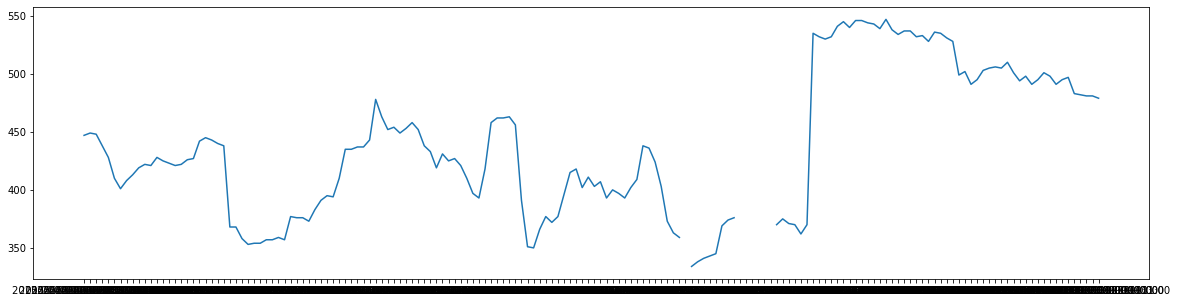

In [9]:
# Visualizando alguns dados missing
x = data_energia[:24*7]['time']
y = data_energia[:24*7]['generation biomass']
plt.figure(figsize=(20, 5))
plt.plot(x, y)

In [10]:
# Como existem poucos dados faltantes, uma interpolação não deve afetar a performance do modelo.
# Uma interpolação linear liga dois pontos por uma reta.
data_energia.interpolate(method='linear', limit_direction='forward', inplace=True)

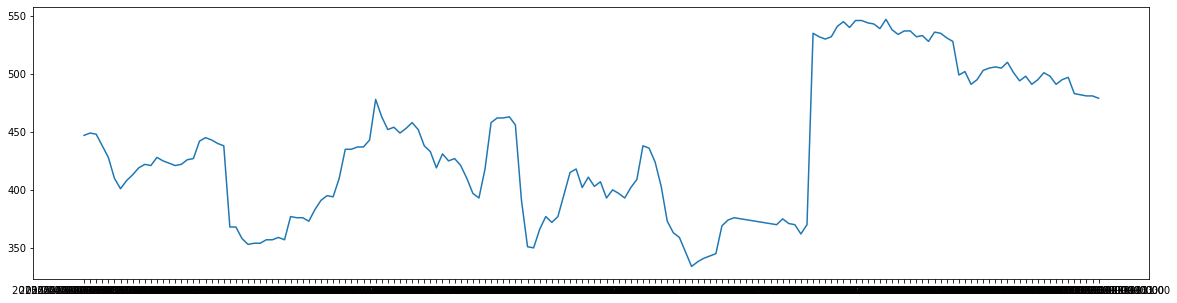

In [11]:
x = data_energia[:24*7]['time']
y = data_energia[:24*7]['generation biomass']
plt.figure(figsize=(20, 5))
plt.plot(x, y)

In [12]:
# Converter a coluna "time" para data
data_energia['time'] = pd.to_datetime(data_energia['time'], utc=True)
data_energia = data_energia.set_index('time')

### Dataset Clima

In [13]:
# Iniciando a Exploração dos dados de clima
data_clima.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [14]:
data_clima.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [15]:
# Convertendo as colunas do type int para o type float
colunas_int = data_clima.select_dtypes(include=[np.int64]).columns # Seleciona as colunas do tipo int (nome das colunas)
data_clima[colunas_int] = data_clima[colunas_int].astype(np.float64) # Muda o type das colunas para float
colunas_int

Index(['pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all',
       'weather_id'],
      dtype='object')

In [16]:
# Convertendo os dados temporais para o tipo datetime
data_clima['time'] = pd.to_datetime(data_clima['dt_iso'], utc=True)
data_clima.drop(['dt_iso'], axis=1, inplace=True)

In [17]:
# Verificando dados missing
display(data_clima.isnull().sum().to_frame(name='Nulls') / data_clima.shape[0] * 100)
data_clima.eq(0).sum().to_frame(name='Zeros') / data_clima.shape[0] * 100

,Nulls
city_name,0.0
temp,0.0
temp_min,0.0
temp_max,0.0
pressure,0.0
humidity,0.0
wind_speed,0.0
wind_deg,0.0
rain_1h,0.0
rain_3h,0.0


,Zeros
city_name,0.000000
temp,0.000000
temp_min,0.000000
temp_max,0.000000
pressure,0.001121
humidity,0.035315
wind_speed,10.364582
wind_deg,13.968923
rain_1h,89.132043
rain_3h,98.960178


#### Variaveis do tipo object (categóricas)

In [18]:
# Verificando as variaveis categoricas
weather_description = data_clima['weather_description'].value_counts()
print('Quantidade de categorias', weather_description.shape[0])
weather_description

Quantidade de categorias 43


sky is clear                    82685
few clouds                      32101
broken clouds                   17448
scattered clouds                15945
light rain                      10905
mist                             3908
moderate rain                    3621
overcast clouds                  2561
fog                              2506
light intensity drizzle          1241
heavy intensity rain             1142
light intensity shower rain       657
proximity thunderstorm            480
proximity shower rain             476
haze                              435
shower rain                       426
drizzle                           369
dust                              345
thunderstorm                      309
light snow                        140
thunderstorm with rain            127
thunderstorm with light rain       92
heavy intensity shower rain        81
light intensity drizzle rain       79
very heavy rain                    78
snow                               74
smoke       

In [19]:
weather_main = data_clima['weather_main'].value_counts()
print('Quantidade de categorias', weather_main.shape[0])
weather_main

Quantidade de categorias 12


clear           82685
clouds          68055
rain            17391
mist             3908
fog              2506
drizzle          1724
thunderstorm     1041
haze              435
dust              347
snow              270
smoke              33
squall              1
Name: weather_main, dtype: int64

In [20]:
weather_icon = data_clima['weather_icon'].value_counts()
print('Quantidade de categorias', weather_icon.shape[0])
weather_icon

Quantidade de categorias 24


01n    38541
01d    34830
02d    19199
02n    12368
04d     9137
04n     8403
03d     7870
10n     5951
01      5946
03n     5833
10      4917
10d     4882
50n     4288
02      3902
50d     2942
04      2469
03      2242
09d     1976
09n     1389
11d      624
11n      417
13d      130
13n      103
13        37
Name: weather_icon, dtype: int64

In [21]:
weather_id = data_clima['weather_id'].value_counts()
print('Quantidade de categorias', weather_id.shape[0])
weather_id

Quantidade de categorias 38


800.0    82685
801.0    32101
803.0    17448
802.0    15945
500.0    10905
701.0     3908
501.0     3625
804.0     2561
741.0     2506
300.0     1241
502.0     1142
521.0      902
211.0      789
520.0      657
721.0      435
301.0      371
761.0      345
600.0      140
201.0      127
200.0       92
522.0       81
310.0       79
503.0       78
601.0       74
711.0       33
202.0       31
615.0       20
311.0       19
302.0       14
616.0       13
611.0       13
612.0        4
602.0        3
620.0        3
210.0        2
731.0        2
531.0        1
771.0        1
Name: weather_id, dtype: int64

In [22]:
# Aparentemente essas variaveis são correlacionadas, ou seja, a variável "weather_description" aparente ser uma variável com mais detalhes referentes ao clima.
# Iremos remover as outras
data_clima.drop(['weather_main', 'weather_icon', 'weather_id'], axis=1, inplace=True)
# Drop columns com muitos valores 0 ou nulos
data_clima.drop(['snow_3h', 'rain_3h'], axis=1, inplace=True)

#### Amostras em cada cidade

In [23]:
# Verificando a quantidade de amostras por cidade
clima_agrupado = data_clima.groupby('city_name')
nomes_cidades = data_clima['city_name'].unique()
for nome in nomes_cidades:
    print(nome, clima_agrupado.get_group(nome).shape[0])
print('Dataset Energia:', data_energia.shape[0])

# Existem mais amostras de clima que de energia, pode ser que existam dados duplicados

Valencia 35145
Madrid 36267
Bilbao 35951
 Barcelona 35476
Seville 35557
Dataset Energia: 35064


In [24]:
# Removendo linhas duplicadas
data_clima.drop_duplicates(subset=['time', 'city_name'], keep='first', inplace=True)
data_clima.set_index('time', inplace=True) # Setando o index como time

In [25]:
# Verificando novamente a quantidade de amostras por cidade
clima_agrupado = data_clima.groupby('city_name')
nomes_cidades = data_clima['city_name'].unique()
for nome in nomes_cidades:
    print(nome, clima_agrupado.get_group(nome).shape[0])
print('Dataset Energia:', data_energia.shape[0])

Valencia 35064
Madrid 35064
Bilbao 35064
 Barcelona 35064
Seville 35064
Dataset Energia: 35064


#### Label Encoding

In [26]:
# Aplicando lqbel encoding na variável "weather_description"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_clima['weather_description'] = le.fit_transform(data_clima['weather_description'])

In [27]:
data_clima.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,weather_description
time,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,31
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,31
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,31
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,31
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,31


#### Datasets distintos

In [28]:
# Criando 5 datasets distintos (um para cada cidade):
df1, df2, df3, df4, df5 = [x for _, x in data_clima.groupby('city_name')] # x é o dataset agrupado da cidade e _ é o nome da cidade
datasets_clima = [df1, df2, df3, df4, df5]

In [29]:
dataset_final = data_energia.copy()

for df in datasets_clima:
    nome_cidade = str(df['city_name'][0]).replace("'", "").replace(" ", "") # Eliminando as aspas e espaços
    df = df.add_suffix(f'_{nome_cidade}') # Adicionando o nome da cidade ao final do nome das colunas
    dataset_final = dataset_final.merge(df, on='time') # Juntando os datasets
    dataset_final = dataset_final.drop([f'city_name_{nome_cidade}'], axis=1) # Removendo a coluna "city_name"

In [30]:
dataset_final.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,clouds_all_Barcelona,weather_description_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,clouds_all_Bilbao,weather_description_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,clouds_all_Madrid,weather_description_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,clouds_all_Seville,weather_description_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia,weather_description_Valencia
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,31,269.657312,269.657312,269.657312,1036.0,97.0,0.0,226.0,0.0,0.0,31,267.325,267.325,267.325,971.0,63.0,1.0,309.0,0.0,0.0,31,273.375,273.375,273.375,1039.0,75.0,1.0,21.0,0.0,0.0,31,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,31
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,31,269.763500,269.763500,269.763500,1035.0,97.0,0.0,229.0,0.0,0.0,31,267.325,267.325,267.325,971.0,63.0,1.0,309.0,0.0,0.0,31,273.375,273.375,273.375,1039.0,75.0,1.0,21.0,0.0,0.0,31,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,31
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,31,269.251688,269.251688,269.251688,1036.0,97.0,1.0,224.0,0.0,0.0,31,266.186,266.186,266.186,971.0,64.0,1.0,273.0,0.0,0.0,31,274.086,274.086,274.086,1039.0,71.0,3.0,27.0,0.0,0.0,31,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,31
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,31,269.203344,269.203344,269.203344,1035.0,97.0,1.0,225.0,0.0,0.0,31,266.186,266.186,266.186,971.0,64.0,1.0,273.0,0.0,0.0,31,274.086,274.086,274.086,1039.0,71.0,3.0,27.0,0.0,0.0,31,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,31
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,31,269.485500,269.485500,269.485500,1035.0,97.0,1.0,221.0,0.0,0.0,31,266.186,266.186,266.186,971.0,64.0,1.0,273.0,0.0,0.0,31,274.086,274.086,274.086,1039.0,71.0,3.0,27.0,0.0,0.0,31,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,31


In [31]:
data_energia.shape

(35064, 16)

In [32]:
data_clima.shape

(175320, 11)

In [33]:
dataset_final.shape

(35064, 66)

## Correlação entre as variáveis

price actual                                   1.000000
generation fossil hard coal                    0.465637
generation fossil gas                          0.461452
total load actual                              0.435253
generation fossil brown coal/lignite           0.363993
                                                 ...   
wind_speed_Barcelona                          -0.138658
wind_speed_Bilbao                             -0.143327
generation wind onshore                       -0.220497
wind_speed_Madrid                             -0.245861
generation hydro pumped storage consumption   -0.426196
Name: price actual, Length: 66, dtype: float64

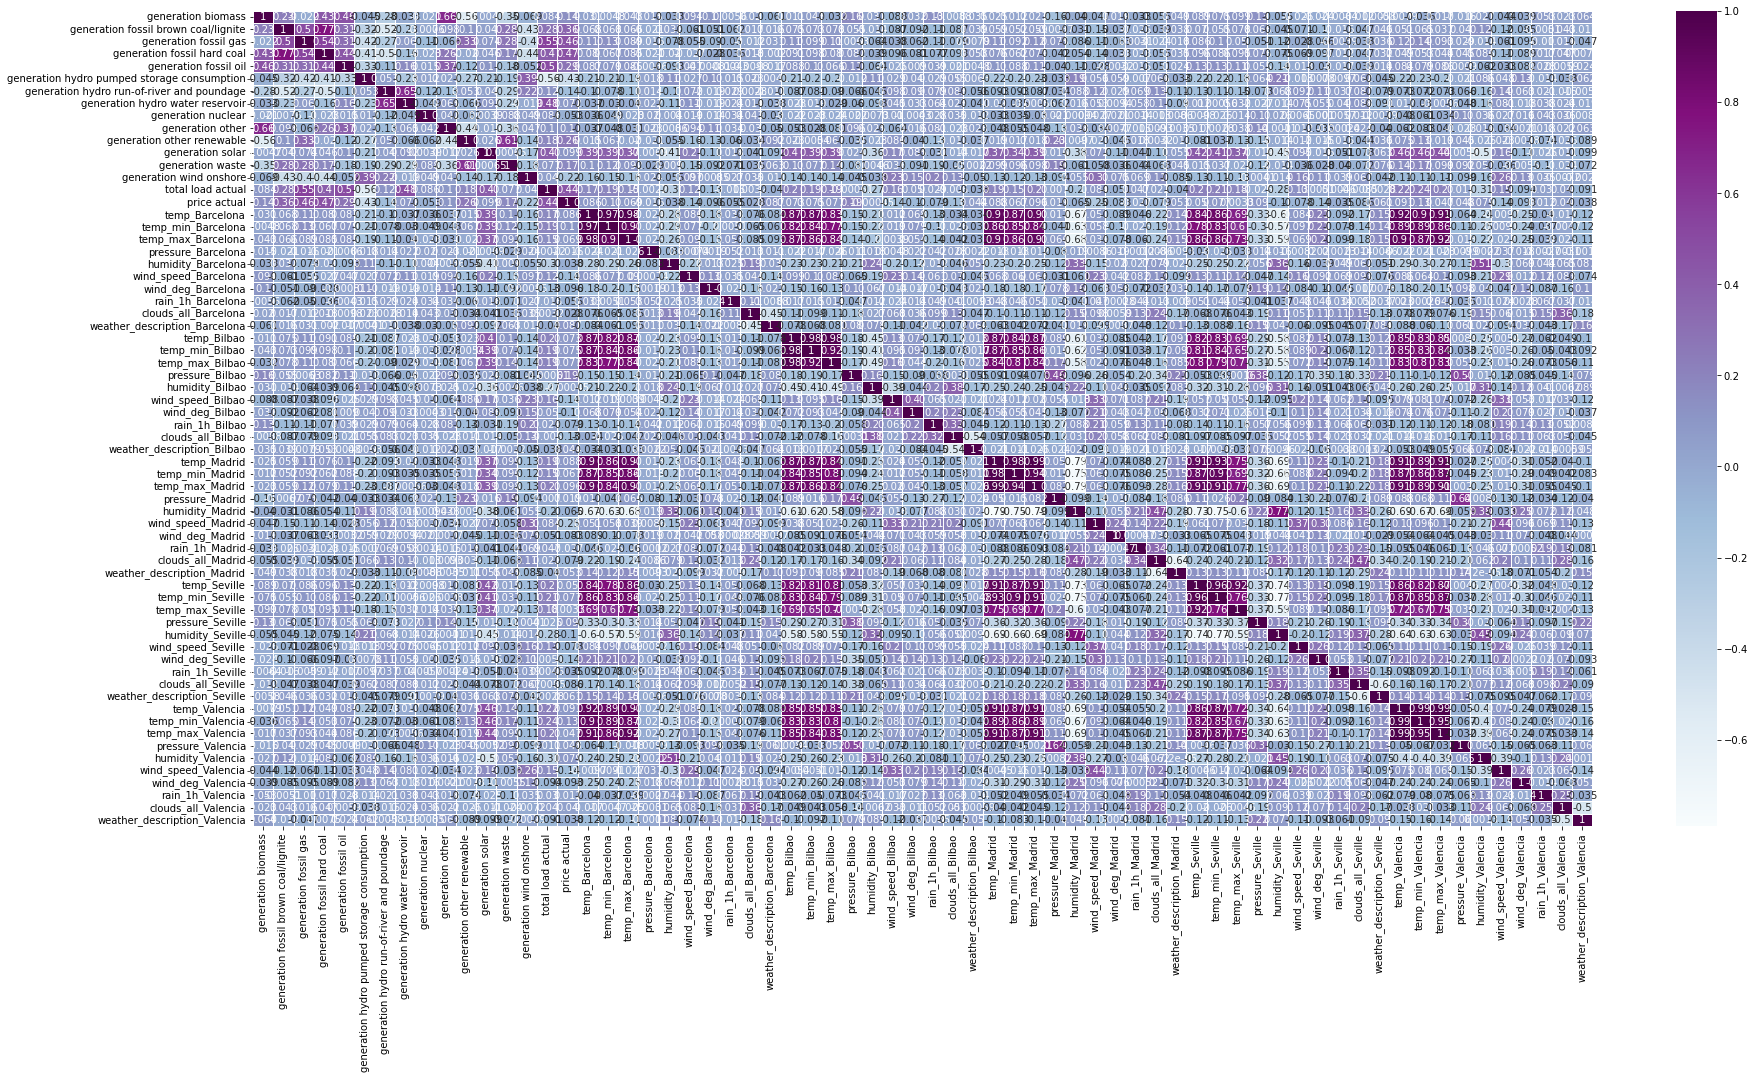

In [35]:
# Correlação entre as colunas do dataset energia
display(dataset_final.corr(method='pearson')['price actual'].sort_values(ascending=False))

# Heatmap das correlações
plt.figure(figsize=(30,15))
sns.heatmap(dataset_final.corr(method='pearson'), annot=True, cmap='BuPu', linewidths=0.5)
plt.show()